In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pmsystem_project_list_file = '(Input) ProjectListExport.xls'
cft_list_file = '(Input) CFTListExport.xls'
prweb_file = '(Input) New Production Status Summary.xlsx'

start_from = '2022-05'

consumer_dpqe_list = ['Lo, Aalto','Kuo, Chris','Wang, Cooper', 'Fu, Ernest','Hsu, Jason(PQE)','Ni, Wendy','Wang, Evelyn','Hsu, Jason(PQE);\nWang, Evelyn'] 
# 'Hsu, Jason(PQE);\nWang, Evelyn' is for GPSMAP 9000 series

# PM system

Read

In [3]:
pmsystem_project = pd.read_excel(pmsystem_project_list_file, usecols=[0,1,3,4,5,6,9,10,12], parse_dates=[2,3,4,5], index_col=[0])
pmsystem_cft = pd.read_excel(cft_list_file, usecols=[0,44], index_col=[0])

c:\Users\wangcooper\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
pmsystem_cft.head()

,Develop Product QE (DPQE)
Project ID,
13939,"Kuo, Chris"
15274,"Kuo, Chris"
15624,"Lo, Aalto"
13009,"Kuo, Chris"
14984,"Kuo, Chris"


In [5]:
pmsystem_project = pmsystem_project[(pmsystem_project['PDP/Form107'] == 'PDP')]

In [6]:
pmsystem_project.head()

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status
Project ID,,,,,,,,
13939,BC50 & BC50 Night Vision,2021-08-20,NaT,2022-04-25,2022-01-04,Global,PDP,Development
15274,"BC50, ASIA",NaT,2021-10-29,2022-07-25,2022-04-27,Asia,PDP,Development
15624,Catalyst Kart/Moto/Roadster,2022-06-24,2022-10-10,2023-03-06,2022-12-29,Global,PDP,Development
13009,Dash Cam Live (LTE),2021-06-25,2022-03-11,2022-10-24,2022-08-24,Global,PDP,Development
14984,"Dash Cam Live (LTE), ASIA",NaT,2022-03-31,2022-11-07,2022-09-26,Asia,PDP,Development


Merge project and CFT lists

In [7]:
pmsystem_project_cft = pd.merge(left=pmsystem_project, right=pmsystem_cft, left_index=True, right_index=True)
pmsystem_project_cft.sort_index().head()

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,
152,"nuvi 3595,GPS,TWN",2012-03-27,2012-08-31,2012-10-31,2012-10-04,Asia,PDP,Production,"Ni, Wendy"
222,Nuvi 2585 LT,NaT,2011-02-25,2012-07-23,2011-02-25,Asia,PDP,Production,"Ni, Wendy"
236,GDR30,2012-06-07,2012-07-24,2012-10-15,2012-09-03,Asia,PDP,Production,"Ni, Wendy"
237,GDR35,NaT,2012-08-06,2012-10-22,2012-08-06,Asia,PDP,Production,"Ni, Wendy"
253,GPS21x Asia,NaT,2012-06-26,2012-12-26,2012-10-25,Asia,PDP,Production,"Kuo, Chris"


Find projects which WW/ASIA SKU have different DPQE

In [8]:
ww_asia_diff = pmsystem_project_cft

In [9]:
#Handle Asis words in 'Project Name' column
ww_asia_diff['Project Name'] = ww_asia_diff['Project Name'].apply(lambda name : name.split(',')[0])
ww_asia_diff['Project Name'] = ww_asia_diff['Project Name'].str.replace('ASIA','')
ww_asia_diff['Project Name'] = ww_asia_diff['Project Name'].str.replace('Asia','')

In [10]:
# check any missing
ww_asia_diff[ww_asia_diff['Project Name'].str.contains('ASIA|asia|Asia')]

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,


In [11]:
ww_asia_diff = ww_asia_diff[['Project Name','Develop  Product QE (DPQE)','Global/Asia','MP Date']].loc[ww_asia_diff['MP Date']> start_from]

In [12]:
# Find duplicated projects
ww_asia_diff = ww_asia_diff[ww_asia_diff.duplicated(subset=['Project Name'],keep=False)]
ww_asia_diff

,Project Name,Develop Product QE (DPQE),Global/Asia,MP Date
Project ID,,,,
13009,Dash Cam Live (LTE),"Kuo, Chris",Global,2022-10-24
14984,Dash Cam Live (LTE),"Kuo, Chris",Asia,2022-11-07
14994,Edge Explore 2,"Kuo, Chris",Global,2022-05-30
16259,Edge Explore 2,"Kuo, Chris",Asia,2022-07-18
14529,Forerunner 265,"Fu, Ernest",Global,2023-01-03
16262,Forerunner 265,"Fu, Ernest",Asia,2023-01-30
16002,Forerunner 965,"Fu, Ernest",Global,2023-01-09
16263,Forerunner 965,"Fu, Ernest",Asia,2023-01-30
15520,Venu 3,"Wang, Cooper",Global,2023-05-29


In [13]:
# Find projects have different DPQE
ww_asia_diff[~ww_asia_diff.duplicated(subset=['Project Name','Develop  Product QE (DPQE)'],keep=False)]

,Project Name,Develop Product QE (DPQE),Global/Asia,MP Date
Project ID,,,,


In [41]:
ww_asia_diff[~ww_asia_diff.duplicated(subset=['Project Name','Develop  Product QE (DPQE)'],keep=False)].to_excel('(Output) Projects which WW ASIA SKU have different DPQE.xlsx')

Find projects w/o DPQE (include ASIA SKUs)

In [15]:
pmsystem_project_cft[pmsystem_project_cft['Develop  Product QE (DPQE)'].isnull()].dropna(thresh=5, axis=0).loc[(pmsystem_project_cft['MP Date']>start_from)]

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,
16245,Online Map Service,NaT,NaT,2022-08-01,NaT,Asia,PDP,Development,NaN
16499,BMW Motorrad Connectivity unit RFQ,NaT,NaT,2025-12-31,NaT,Asia,PDP,Concepts,NaN
16227,Honda MLJX RFQ,NaT,NaT,2024-08-31,NaT,Asia,PDP,Concepts,NaN


In [16]:
pmsystem_project_cft[pmsystem_project_cft['Develop  Product QE (DPQE)'].isnull()].dropna(thresh=5, axis=0).loc[(pmsystem_project_cft['MP Date']>start_from)].to_excel('(Output) Projects (include ASIA SKU) in PM system without DPQE.xlsx')

Find projects with multi-DPQE (include ASIA SKUs)

In [17]:
multi_dpqe = pmsystem_project_cft[['Project Name','Global/Asia','Develop  Product QE (DPQE)','MP Date']]
multi_dpqe = multi_dpqe[multi_dpqe['MP Date']>start_from]
multi_dpqe.dropna(inplace=True)

In [18]:
multi_dpqe[multi_dpqe['Develop  Product QE (DPQE)'].str.contains('\n')]

,Project Name,Global/Asia,Develop Product QE (DPQE),MP Date
Project ID,,,,
9946,GPSMAP 9000,Global,"Hsu, Jason(PQE);\nWang, Evelyn",2023-05-29
10718,BMW MGU22,Global,"Chen, Tiffany(QA);\nKelly, Joan;\nBruns, Melan...",2022-06-20
14434,IMWW23,Asia,"Tsai, Cherry;\nKo, Simon",2023-09-18
11792,IXWW22,Asia,"Tsai, Cherry;\nKo, Simon",2022-06-27
10340,TXTW22_Drive+3.0 (Taroko),Asia,"Hu, Ray;\nKo, Simon",2022-07-08


Melt

In [19]:
df_consumer_dpqe = pmsystem_project_cft[pmsystem_project_cft['Develop  Product QE (DPQE)'].isin(consumer_dpqe_list)].sort_index()
df_consumer_dpqe = df_consumer_dpqe[df_consumer_dpqe['Global/Asia']=='Global']
df_consumer_dpqe.head()

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,
1078,GMI20/GHC20,2012-11-29,2013-01-10,2013-06-11,2013-04-26,Global,PDP,Production,"Hsu, Jason(PQE)"
1079,GNX 20/21,2013-06-21,2013-11-25,2014-03-24,2014-01-24,Global,PDP,Production,"Hsu, Jason(PQE)"
1080,GXM 52,2013-01-07,2013-08-06,2013-12-09,2013-10-23,Global,PDP,Production,"Hsu, Jason(PQE)"
1084,8000 GRID and SD Card Reader,2011-10-07,2012-07-27,2013-04-17,2013-01-30,Global,PDP,Production,"Hsu, Jason(PQE)"
1086,echoMAP 70s & GPSMAP 7x1,2012-08-29,2012-12-21,2013-06-10,2013-05-17,Global,PDP,Production,"Hsu, Jason(PQE)"


In [20]:
value_vars = ['Working Prototype Built and Tested','Final Factory Prototypes Built','PR Date','MP Date']

pmsystem_project_dpqe_melted = df_consumer_dpqe.reset_index().melt(id_vars= ['Project ID','Project Name','Develop  Product QE (DPQE)'],value_vars=value_vars)
pmsystem_project_dpqe_melted.head()

,Project ID,Project Name,Develop Product QE (DPQE),variable,value
0,1078,GMI20/GHC20,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2012-11-29
1,1079,GNX 20/21,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2013-06-21
2,1080,GXM 52,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2013-01-07
3,1084,8000 GRID and SD Card Reader,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2011-10-07
4,1086,echoMAP 70s & GPSMAP 7x1,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2012-08-29


In [21]:
pmsystem_project_dpqe_melted.rename(columns={'Develop  Product QE (DPQE)':'DPQE','variable':'Phase','value':'Date'},inplace=True)

In [22]:
pmsystem_project_dpqe_melted.Date = pmsystem_project_dpqe_melted.Date.dt.strftime('%Y-%m')

In [23]:
pmsystem_project_dpqe_melted = pmsystem_project_dpqe_melted[pmsystem_project_dpqe_melted.Date >= start_from]

In [24]:
pmsystem_project_dpqe_melted.isnull().sum()

Project ID      0
Project Name    0
DPQE            0
Phase           0
Date            0
dtype: int64

Weight socre

In [25]:
pmsystem_project_dpqe_melted.loc[:,'weighted_score'] = pmsystem_project_dpqe_melted.loc[:,'Phase'].apply(lambda phase : 1 if (phase == 'Working Prototype Built and Tested') | (phase == 'MP Date') else 2 if phase=='Final Factory Prototypes Built' else 3 if phase=='PR Date' else 0)

In [26]:
pmsystem_project_dpqe_melted = pmsystem_project_dpqe_melted.rename(columns={"Project ID":'PM Project Id','Project Name':'PM Project Name'})

In [27]:
pmsystem_project_dpqe_melted.head()

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score
980,8510,Xero L60i Laser Navigator,"Kuo, Chris",Working Prototype Built and Tested,2022-05,1
1047,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1
1134,11778,Tire Temp Sensor,"Ni, Wendy",Working Prototype Built and Tested,2022-08,1
1186,12799,Descent S1 Buoy,"Lo, Aalto",Working Prototype Built and Tested,2022-07,1
1200,12994,Descent Mk3,"Wang, Cooper",Working Prototype Built and Tested,2022-12,1


# PRweb

Read

In [28]:
prweb = pd.read_excel(prweb_file, header=1, usecols=[0,3])
prweb.head()

,Project Name,PM Project Id
0,LYWW24,15976
1,Xero B60i Laser Navigation Binoculars,13229
2,LED Control Module,13134
3,Product - GDU147XW,12509
4,Descent Mk3 Series - Large,12994


Merge with data from PMsystem

In [29]:
prweb_pmsystem = pd.merge(left=pmsystem_project_dpqe_melted, right=prweb, how='left', left_on='PM Project Id', right_on='PM Project Id', suffixes=['_PMsystem','_prweb'])

In [30]:
prweb_pmsystem.head()

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score,Project Name
0,8510,Xero L60i Laser Navigator,"Kuo, Chris",Working Prototype Built and Tested,2022-05,1,Xero L60i Laser Navigator
1,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,GPSMAP 9000_Black Box
2,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 19"""
3,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 24"""
4,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 -27"""


Handle GPSMAP 9000 19"

In [31]:
'Hsu, Jason(PQE);\nWang, Evelyn'.replace('\n','').split(';')

['Hsu, Jason(PQE)', 'Wang, Evelyn']

In [32]:
# GPSMAP 9000 - 19" to Wang, Evelyn, others to Hsu, Jason(PQE)
def gpsmap_9000 (project_name, DPQE):
    if project_name == 'GPSMAP 9000 - 19"':
        return DPQE.replace('\n','').split(';')[1] #Wang, Evelyn
    elif project_name in ['GPSMAP 9000 - 22"','GPSMAP 9000 - 24"','GPSMAP 9000 -27"','GPSMAP 9000_Black Box']:
        return DPQE.replace('\n','').split(';')[0] #Hsu, Jason(PQE)
    else:
        return DPQE


In [33]:
prweb_pmsystem['DPQE'] = np.vectorize(gpsmap_9000)(prweb_pmsystem['Project Name'],prweb_pmsystem['DPQE'])

In [34]:
prweb_pmsystem[prweb_pmsystem['PM Project Name'] == 'GPSMAP 9000']

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score,Project Name
1,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,GPSMAP 9000_Black Box
2,9946,GPSMAP 9000,"Wang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 19"""
3,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 24"""
4,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 -27"""
5,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 22"""
44,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-12,2,GPSMAP 9000_Black Box
45,9946,GPSMAP 9000,"Wang, Evelyn",Final Factory Prototypes Built,2022-12,2,"GPSMAP 9000 - 19"""
46,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-12,2,"GPSMAP 9000 - 24"""
47,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-12,2,"GPSMAP 9000 -27"""
48,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-12,2,"GPSMAP 9000 - 22"""


# Heatmap

In [35]:
prweb_pmsystem.groupby(['DPQE','Project Name','Date']).agg({'weighted_score':'sum','Project Name':'count'}).sort_index(level='Date').rename(columns=({'weighted_score':'Weighted_Project_counts','Project Name':'Project_counts'})).unstack().to_excel('(Output) Project conts.xlsx')

Overall w/o project names

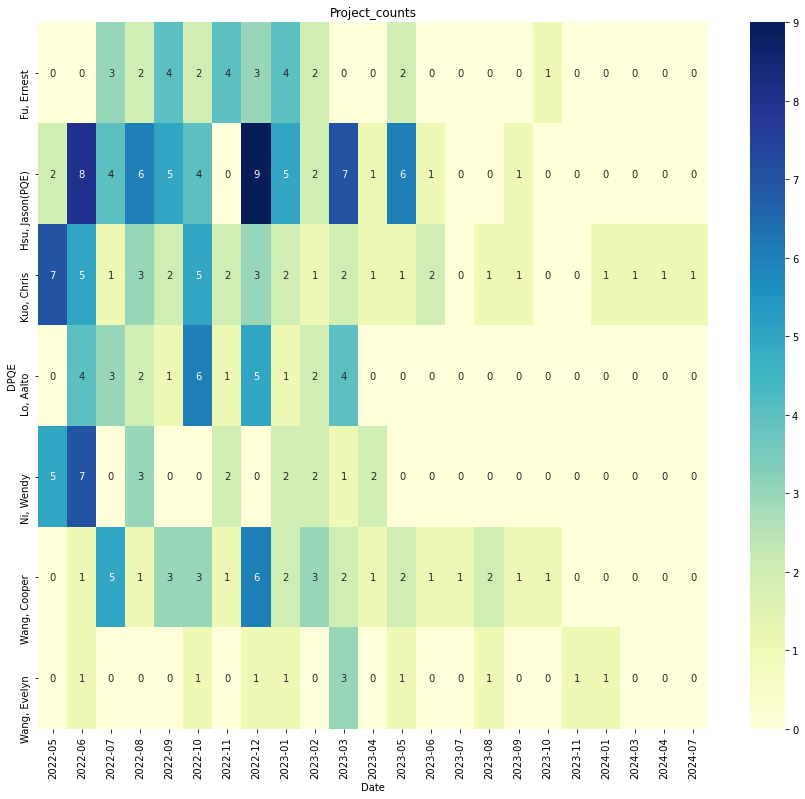

In [36]:
plt.figure(figsize=(15,13))
sns.heatmap(prweb_pmsystem.groupby(['DPQE','Date']).count()['Project Name'].sort_index(level='Date').unstack(fill_value=0), cmap="YlGnBu", annot=True, linecolor='orange').set_title('Project_counts');

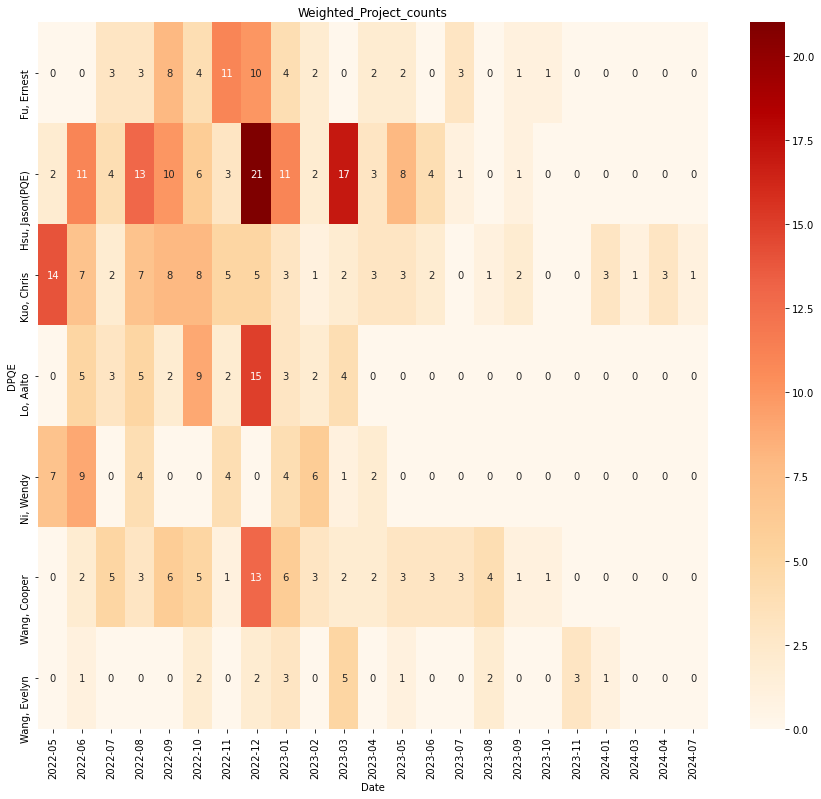

In [37]:
plt.figure(figsize=(15,13))
sns.heatmap(prweb_pmsystem.groupby(['DPQE','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(fill_value=0), cmap="OrRd", annot=True).set_title('Weighted_Project_counts');

Overall with project names

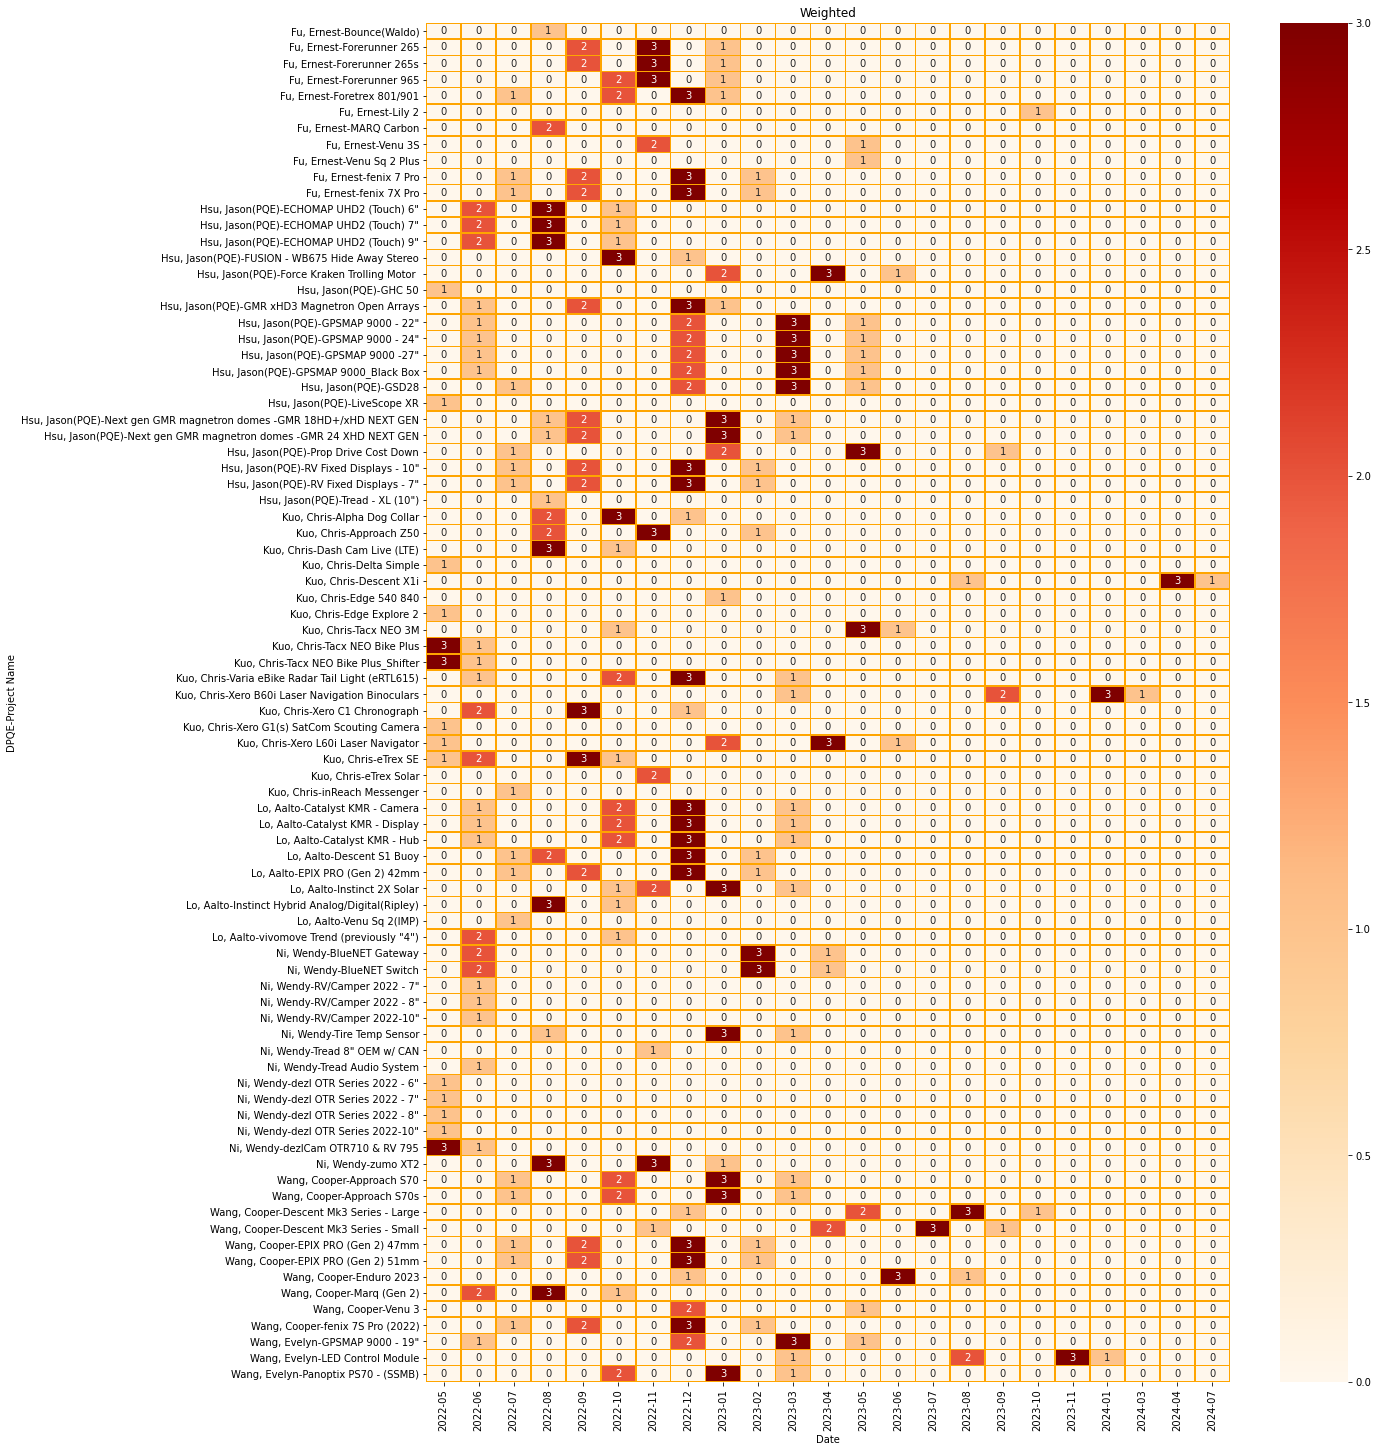

In [38]:
plt.figure(figsize=(18,25))
sns.heatmap(prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(fill_value=0), cmap="OrRd", annot=True,linewidths=0.5, linecolor='orange').set_title('Weighted');

In [39]:
prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()

PM Project Id  weighted_score
DPQE         Project Name           Date                                  
Fu, Ernest   Bounce(Waldo)          2022-08          10919               1
             Forerunner 265         2022-09          14529               2
                                    2022-11          14529               3
                                    2023-01          14529               1
             Forerunner 265s        2022-09          14529               2
...                                                    ...             ...
Wang, Evelyn LED Control Module     2023-11          13134               3
                                    2024-01          13134               1
             Panoptix PS70 - (SSMB) 2022-10          10091               2
                                    2023-01          10091               3
                                    2023-03          10091               1

[230 rows x 2 columns]

Details for each DPQE

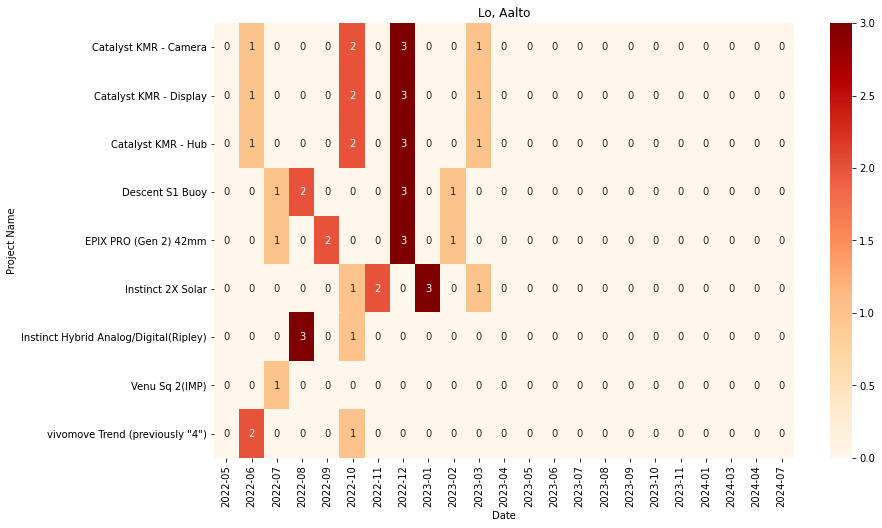

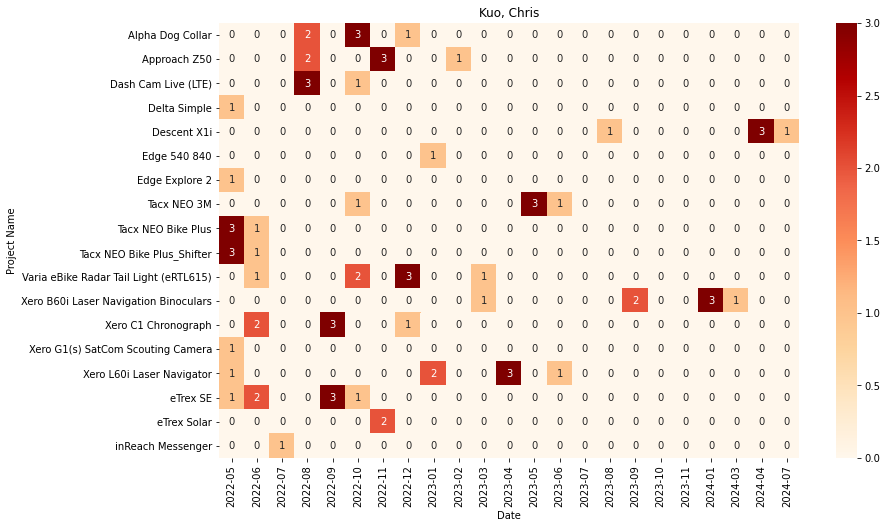

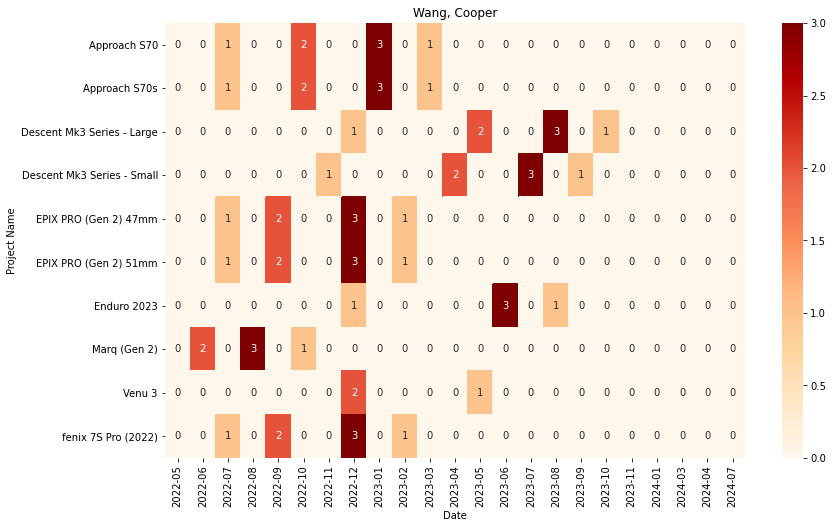

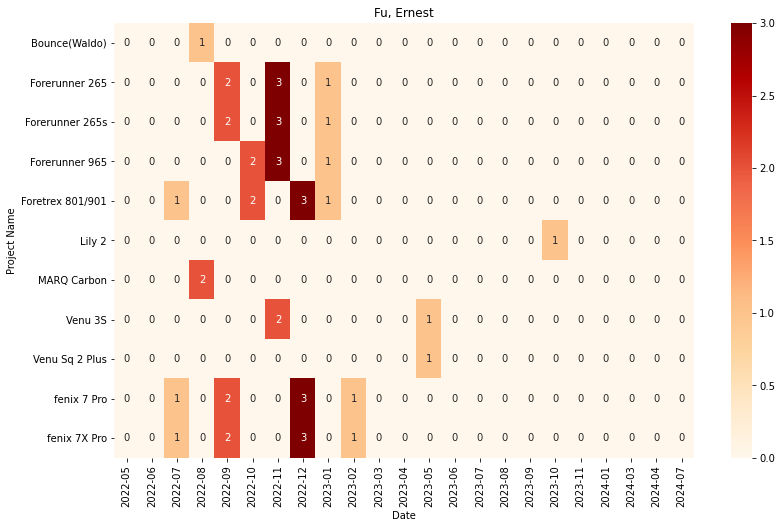

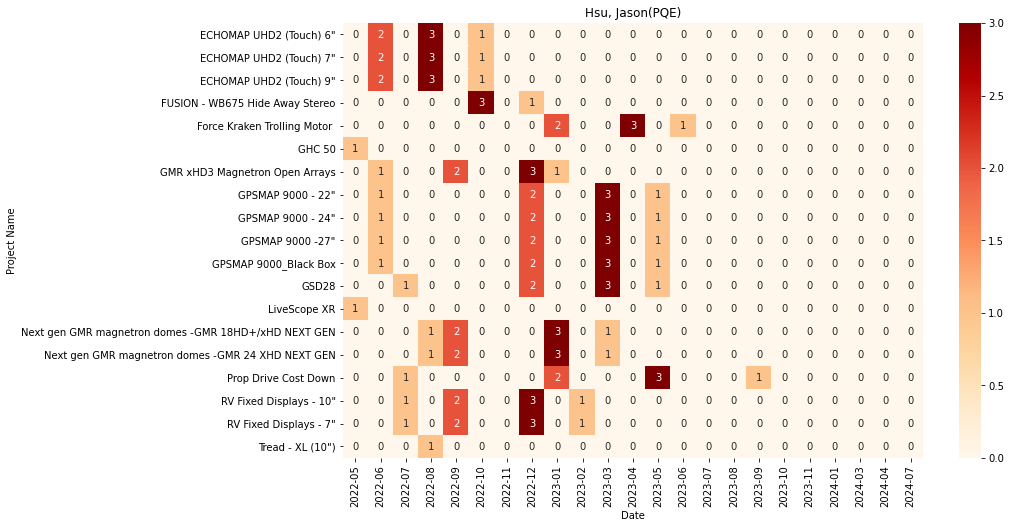

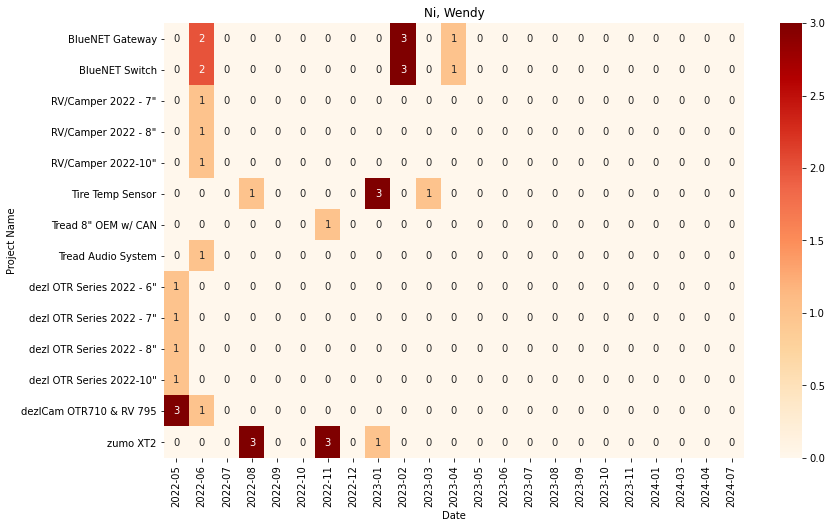

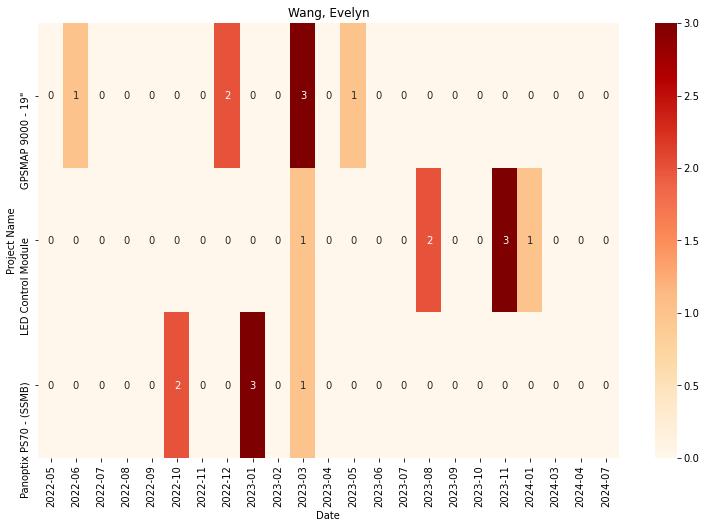

In [40]:
for member in consumer_dpqe_list[:-1]: #-1 is to skip 'Hsu, Jason(PQE);\nWang, Evelyn' in tail of list
    plt.figure(figsize=(13,8))
    sns.heatmap(prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(fill_value=0).loc[member],cmap="OrRd", annot=True).set(title=member);